In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import itertools
import sklearn
from sklearn import linear_model
import math
import random

In [2]:
def intermittent(nt,dt,mean_bal_sac,sigma_bal_sac,diffusion,mean_bal_fix,sigma_bal_fix,noise,rate12,rate21):
    regime_list = [1]
    regime = 1
    dts = math.sqrt(dt)
    s = np.zeros(nt)
    x = np.zeros(nt)
    y = np.zeros(nt)
    time_since_last_jump = 0
    waitt   = -math.log(1.0-np.random.uniform(0.0,1.0,None))/rate12
    for i in range(1,nt):
        angle = random.random()*2*math.pi
        time_since_last_jump += dt
        
        if regime == 1:
            diffu = diffusion*np.random.normal(0,1)*dts + np.random.normal(mean_bal_fix,sigma_bal_fix)*dt
            dx = diffu*math.cos(angle)
            dy = diffu*math.sin(angle)
            ds = np.sqrt(dx**2 + dy**2)
            x[i] = x[i-1] + dx
            y[i] = y[i-1] + dy
            s[i] = s[i-1] + ds
            if time_since_last_jump> waitt:
                waitt   = -math.log(1.0-np.random.uniform(0.0,1.0,None))/rate21
                regime = 2
                #angle2 = random.random()*2*math.pi
                angle2 = angle
                time_since_last_jump =0
        if regime == 2:
            angle3 = angle2  + np.random.normal(0,noise)
            bal = np.random.lognormal(mean_bal_sac,sigma_bal_sac)*dt
            dx = bal*math.cos(angle3)
            dy = bal*math.sin(angle3)
            ds = np.sqrt(dx**2 + dy**2)
            s[i] = s[i-1] + ds
            x[i] = x[i-1] + dx
            y[i] = y[i-1] + dy

            if time_since_last_jump> waitt:
                waitt   = -math.log(1.0-np.random.uniform(0.0,1.0,None))/rate12
                time_since_last_jump =0
                regime = 1
        regime_list.append(regime-1)
        
    return x,y,s,regime_list

In [3]:
def rate_infection(loc_infectiousness,loc_susceptibility,loc_X1,loc_Y1,loc_X2,loc_Y2,loc_len_space):
    return(loc_infectiousness*loc_susceptibility*10**3/(((loc_X1-loc_X2)%loc_len_space)**2 + ((loc_Y1-loc_Y2)%loc_len_space)**2))

In [4]:
####################################
len_space= 70
infection_start_time = 10
starting_infection_rate = 0.1
number_agents = 40
tau = 0.2 #time-step
number_iterations = 1000
susceptability = 1
infectiousness_decrease_rate = 0.7
###################################
diffusion = 1
bal_velocity = 5
rate_dif_to_bal = 0.01
rate_bal_to_dif = 0.3


In [5]:
synthetic = intermittent(number_iterations,tau,np.log(bal_velocity),0,diffusion,0,0,0,rate_dif_to_bal,rate_bal_to_dif)
X = synthetic[0]
Y = synthetic[1]
bin_vector = synthetic[3]

Text(0.5, 1.0, 'Representation of trajectory on a flat plane')

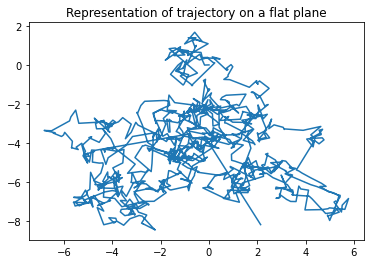

In [6]:
plt.plot(np.array(X),np.array(Y))
plt.title('Representation of trajectory on a flat plane')

Text(0.5, 1.0, 'plane representation of a trajectory on a torus')

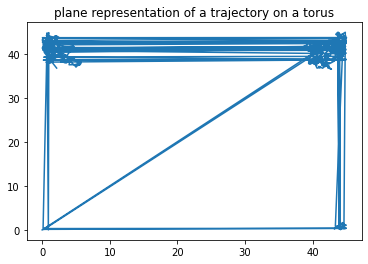

In [7]:
plt.plot(np.array(X)%45,Y%45)
plt.title('plane representation of a trajectory on a torus')

In [8]:
infec_array = list(np.zeros(number_agents))
positions = []
for k in range(number_agents):
    synthetic = intermittent(number_iterations,tau,np.log(bal_velocity),0,diffusion,0,0,0,rate_dif_to_bal,rate_bal_to_dif)
    X = np.array(synthetic[0])%len_space
    Y = np.array(synthetic[1])%len_space
    positions.append([X,Y])

    

    

In [11]:
infection = np.array(list(np.ones(int(number_agents*starting_infection_rate)))  +list(np.zeros(number_agents-int(number_agents*starting_infection_rate))))
overal_infection_population = []
for i in range(number_iterations):
    if i >infection_start_time:
        infection = np.round(np.exp(-infectiousness_decrease_rate*tau)*infection,2)
        for j in range(number_agents):
            for k in range(number_agents):
                if np.round(infection[j],2) < 0.2:
                    if random.random() > np.exp(-1*tau*rate_infection(infection[k],susceptability,positions[j][0][i],positions[k][0][i],positions[j][1][i],positions[k][1][i],len_space)):
                        infection[j] = 1
        overal_infection_population.append(np.sum(infection))
        
        
                    
                    
            
        
    
    



Text(0.5, 1.0, 'Infectiousness rate across the population')

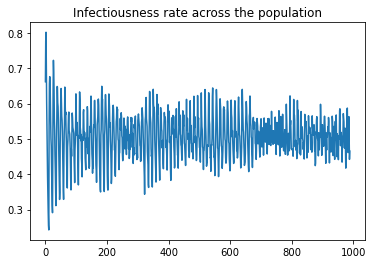

In [12]:
plt.plot(np.array(overal_infection_population)/number_agents)
plt.title('Infectiousness rate across the population')

In [125]:
np.round(infection[j],2)

0.03

In [93]:
infection = np.ones(100)

In [78]:
infection

array([0.25, 0.25, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])